In [4]:
!pip install google-api-python-client

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opentelemetry-proto 1.29.0 requires protobuf<6.0,>=5.0, but you have protobuf 4.25.6 which is incompatible.



  Obtaining dependency information for google-api-python-client from https://files.pythonhosted.org/packages/94/0d/4eacf5bff40a42e6be3086b85164f0624fee9724c11bb2c79305fbc2f355/google_api_python_client-2.164.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for httplib2<1.dev0,>=0.19.0 from https://files.pythonhosted.org/packages/a8/6c/d2fbdaaa5959339d53ba38e94c123e4e84b8fbc4b84beb0e70d7c1608486/httplib2-0.22.0-py3-none-any.whl.metadata
  Obtaining dependency information for google-auth-httplib2<1.0.0,>=0.2.0 from https://files.pythonhosted.org/packages/be/8a/fe34d2f3f9470a27b01c9e76226965863f153d5fbe276f83608562e49c04/google_auth_httplib2-0.2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for uritemplate<5,>=3.0.1 from https://files.pythonhosted.org/packages/81/c0/7461b49cd25aeece13766f02ee576d1db528f1c37ce69aee300e075b485b/uritemplate-4.1.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.

In [17]:
import pandas as pd
import googleapiclient
from googleapiclient.discovery import build

In [ ]:
# we are using the YouTube Data API to fetch details of the top 200 trending videos in the US, 
# iterating through the API’s paginated responses to collect video details such as title, description, published date, 
# channel information, tags, duration, definition, captions, and various engagement metrics like views, likes, and comments. 
# The script compiles this information into a list, converts it into a pandas DataFrame, and saves the data to a CSV file named trending_videos.csv, 
# allowing us to analyze trends and patterns in the collected video data.

In [18]:
API_KEY='Your API KEY'    #replace with your api key

In [19]:

def get_trending_videos(api_key, max_results=200):
    youtube= build('youtube','v3', developerKey= api_key)

    #list for video details
    videos=[]      

    #to get most popular videos
    request = youtube.videos().list(part='snippet,contentDetails,statistics',
        chart='mostPopular',
        regionCode='US',  
        maxResults=50)

    #getting top 200 results
    while request and len(videos)< max_results:
        response= request.execute()
        for item in response['items']:
            video_details={'video_id':item['id'],'title':item['snippet']['title'],'description':item['snippet']['description'],'published_at': item['snippet']['publishedAt'],
                'channel_id': item['snippet']['channelId'],
                'channel_title': item['snippet']['channelTitle'],
                'category_id': item['snippet']['categoryId'],
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'definition': item['contentDetails']['definition'],
                'caption': item['contentDetails'].get('caption', 'false'),
                'view_count': item['statistics'].get('viewCount', 0),
                'like_count': item['statistics'].get('likeCount', 0),
                'dislike_count': item['statistics'].get('dislikeCount', 0),
                'favorite_count': item['statistics'].get('favoriteCount', 0),
                'comment_count': item['statistics'].get('commentCount', 0)}
            videos.append(video_details)

        #getting next page
        request= youtube.videos().list_next(request, response)

    return videos[:max_results]

#converting into dataframe
def save_to_csv(data,filename):
    df= pd.DataFrame(data)
    df.to_csv(filename, index=False)

#saving as csv
def main():
    trending_videos= get_trending_videos(API_KEY)
    filename= 'trending_videos.csv'
    save_to_csv(trending_videos,filename)
    print(f'Trending videos saved to {filename}')

if __name__=='__main__':
    main()

Trending videos saved to trending_videos.csv


In [20]:
import pandas as pd

trending_videos = pd.read_csv('trending_videos.csv')
print(trending_videos.head())

      video_id                                              title  \
0  md9-jG4RzXs       Race Highlights | 2025 Australian Grand Prix   
1  IQJL3htsDyQ                   Can You Fool A Self Driving Car?   
2  y-34-bAKgU8                       I Tried Every Train in Japan   
3  _qssZAbaYkA  NASA's SpaceX Crew-10 Docks With the ISS: All ...   
4  zNhtz0Lygik                           Best Part (feat. H.E.R.)   

                                         description          published_at  \
0  Relive the incredible action from the Australi...  2025-03-16T07:38:24Z   
1  Never underestimate the power of freakin' lase...  2025-03-15T15:00:28Z   
2                                        I ♥️ trains  2025-03-15T15:01:14Z   
3  After a 28-hour flight aboard the Crew Dragon ...  2025-03-16T08:01:19Z   
4  Provided to YouTube by HV Recordings\n\nBest P...  2025-02-27T21:52:20Z   

                 channel_id          channel_title  category_id  \
0  UCB_qr75-ydFVKSF9Dmo6izg              FORMULA 

In [21]:
trending_videos.isna().sum()   #checking missing values

video_id          0
title             0
description       1
published_at      0
channel_id        0
channel_title     0
category_id       0
tags              0
duration          0
definition        0
caption           0
view_count        0
like_count        0
dislike_count     0
favorite_count    0
comment_count     0
dtype: int64

In [47]:
trending_videos.shape  #checking shape

(200, 16)

In [22]:
trending_videos.dtypes    #checking datatypes

video_id          object
title             object
description       object
published_at      object
channel_id        object
channel_title     object
category_id        int64
tags              object
duration          object
definition        object
caption             bool
view_count         int64
like_count         int64
dislike_count      int64
favorite_count     int64
comment_count      int64
dtype: object

In [23]:
trending_videos['description'].fillna('No description', inplace=True)                              #fiiling missing values

trending_videos['published_at']= pd.to_datetime(trending_videos['published_at'])                  #converting into datetime

In [25]:
trending_videos.columns

Index(['video_id', 'title', 'description', 'published_at', 'channel_id',
       'channel_title', 'category_id', 'tags', 'duration', 'definition',
       'caption', 'view_count', 'like_count', 'dislike_count',
       'favorite_count', 'comment_count'],
      dtype='object')

In [26]:
trending_videos[['view_count', 'like_count', 'dislike_count',
       'favorite_count', 'comment_count']].describe()                                           #checking descriptive statistics

,view_count,like_count,dislike_count,favorite_count,comment_count
count,2.000000e+02,2.000000e+02,200.0,200.0,200.000000
mean,3.869088e+06,1.320887e+05,0.0,0.0,7495.975000
std,1.408827e+07,4.496287e+05,0.0,0.0,19449.631542
min,4.106300e+04,0.000000e+00,0.0,0.0,0.000000
25%,4.670190e+05,1.153775e+04,0.0,0.0,917.500000
50%,1.032506e+06,3.296550e+04,0.0,0.0,2727.500000
75%,2.349140e+06,8.949400e+04,0.0,0.0,6759.750000
max,1.614037e+08,4.744339e+06,0.0,0.0,183865.000000


In [ ]:
#Cehcking distribution for the counts

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\D\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


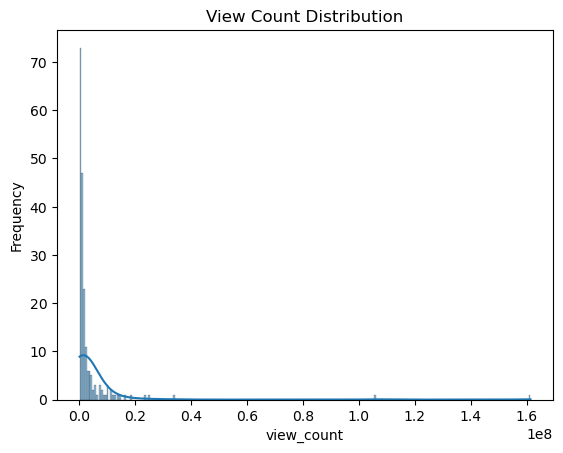

In [37]:
fig, ax = plt.subplots()

sns.histplot(trending_videos['view_count'],kde=True,ax=ax)
ax.set_title('View Count Distribution')
ax.set_xlabel('view_count')
ax.set_ylabel('Frequency')

plt.show()

C:\Users\D\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


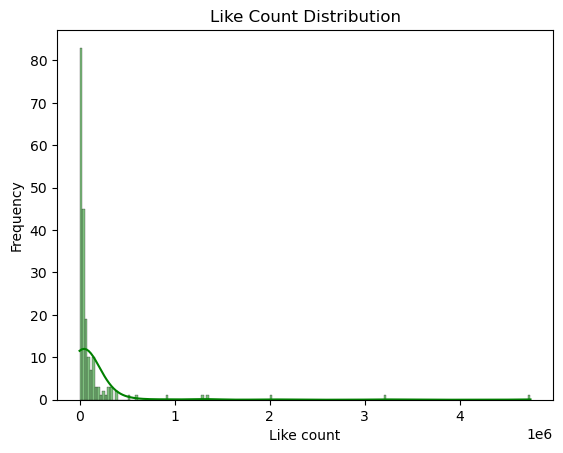

In [35]:
fig, ax = plt.subplots()

sns.histplot(trending_videos['like_count'],kde=True, ax=ax, color='green')
ax.set_title('Like Count Distribution')
ax.set_xlabel('Like count')
ax.set_ylabel('Frequency')

plt.show()

C:\Users\D\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


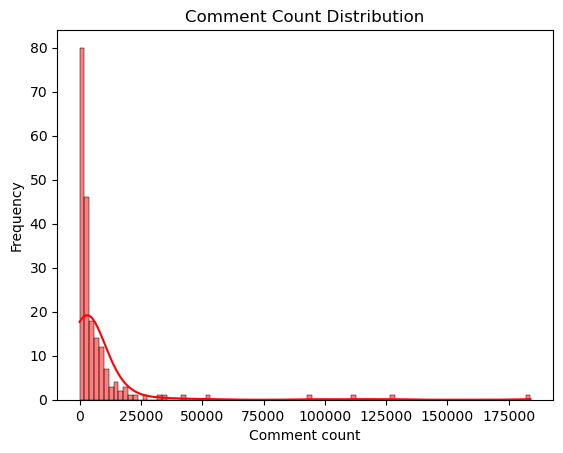

In [57]:
fig, ax = plt.subplots()


sns.histplot(trending_videos['comment_count'],ax=ax, kde=True, color='red')
ax.set_title('Comment Count Distribution')
ax.set_xlabel('Comment count')
ax.set_ylabel('Frequency')

plt.show()

In [41]:
# #The histograms show that the distributions of view counts, like counts, 
# and comment counts are right-skewed, with most videos having lower counts and a few videos having 
# very high counts. Now, let’s have a look at the correlation between likes, views, and comments

In [42]:
correlation = trending_videos[['view_count', 'like_count', 'dislike_count',
       'favorite_count', 'comment_count']].corr()

C:\Users\D\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


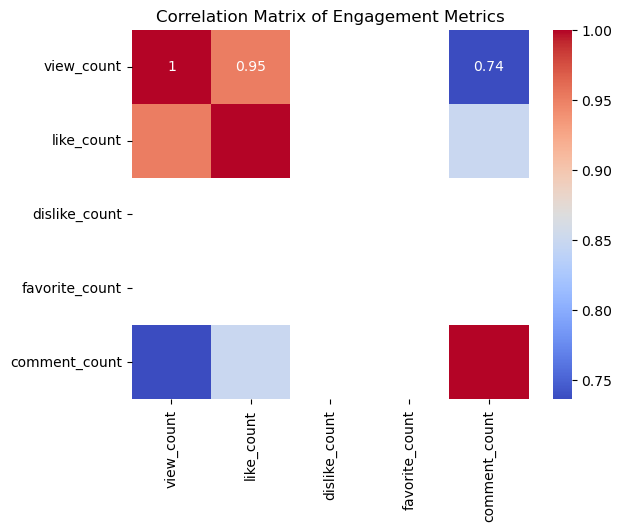

In [46]:
sns.heatmap(correlation, annot=True, cmap='coolwarm',linecolor='black')
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

In [49]:
# Getting category_name from category_id
youtube = build('youtube', 'v3', developerKey=API_KEY)
def get_category_mapping():
    request = youtube.videoCategories().list(
        part='snippet',
        regionCode='US'
    )
    response = request.execute()
    category_mapping = {}
    for item in response['items']:
        category_id = int(item['id'])
        category_name = item['snippet']['title']
        category_mapping[category_id] = category_name
    return category_mapping

# get the category mapping
category_mapping = get_category_mapping()
print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [50]:
#Analysing videos by category

trending_videos['category_name']= trending_videos['category_id'].map(category_mapping)

In [51]:
trending_videos['category_name'].value_counts()

category_name
Sports                  42
Entertainment           40
Music                   33
Gaming                  28
People & Blogs          24
News & Politics         10
Science & Technology     5
Comedy                   5
Autos & Vehicles         4
Howto & Style            4
Film & Animation         3
Travel & Events          2
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Trending Videos by category')

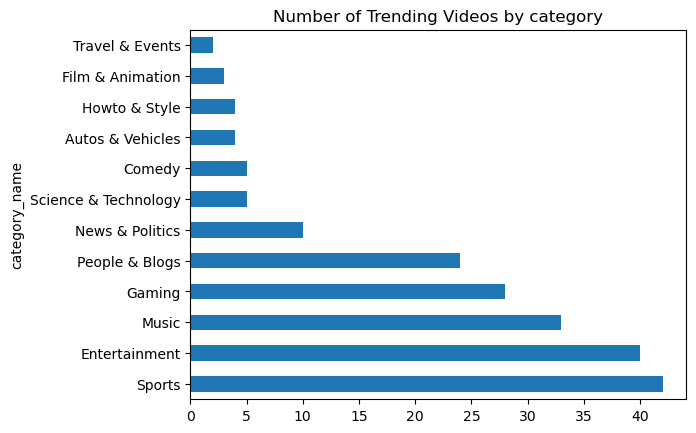

In [55]:
trending_videos['category_name'].value_counts().plot(kind='barh')
plt.title('Number of Trending Videos by category')

In [58]:
print('The top 4 trending categories are Sports, Entertainment, Music, Gaming')

The top 4 trending categories are Sports, Entertainment, Music, Gaming


In [63]:
categorical_viewcount = trending_videos.groupby('category_name')['view_count'].mean()

In [64]:
for i in categorical_viewcount:
    print(i)

1475880.75
808230.8
7227779.625
1784285.6666666667
1459116.1785714286
945943.25
5943351.454545454
761935.0
1394635.2083333333
2613510.4
4123640.238095238
644079.0


In [76]:
categorical_viewcount = trending_videos.groupby('category_name')['view_count'].mean().sort_values(ascending=False)

In [77]:
categorical_viewcount

category_name
Entertainment           7.227780e+06
Music                   5.943351e+06
Sports                  4.123640e+06
Science & Technology    2.613510e+06
Film & Animation        1.784286e+06
Autos & Vehicles        1.475881e+06
Gaming                  1.459116e+06
People & Blogs          1.394635e+06
Howto & Style           9.459432e+05
Comedy                  8.082308e+05
News & Politics         7.619350e+05
Travel & Events         6.440790e+05
Name: view_count, dtype: float64

In [78]:
categorical_viewcount.index                                  #checking categories from index

Index(['Entertainment', 'Music', 'Sports', 'Science & Technology',
       'Film & Animation', 'Autos & Vehicles', 'Gaming', 'People & Blogs',
       'Howto & Style', 'Comedy', 'News & Politics', 'Travel & Events'],
      dtype='object', name='category_name')

In [79]:
categorical_viewcount.values                                  # checking mean values with values

array([7227779.625     , 5943351.45454545, 4123640.23809524,
       2613510.4       , 1784285.66666667, 1475880.75      ,
       1459116.17857143, 1394635.20833333,  945943.25      ,
        808230.8       ,  761935.        ,  644079.        ])

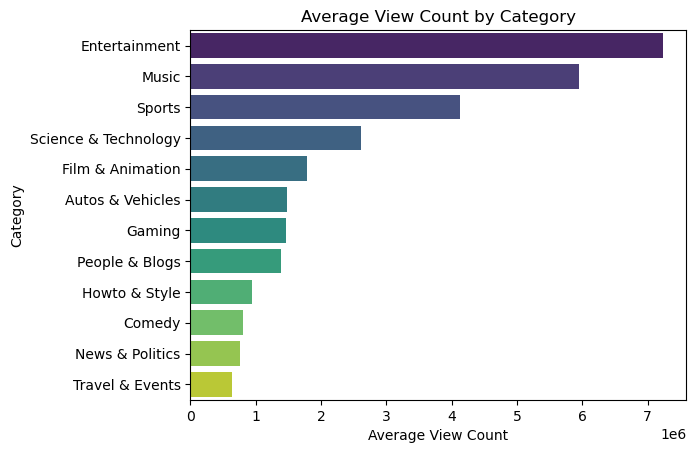

In [85]:
# view count by category
fig, ax = plt.subplots()

sns.barplot(y=categorical_viewcount.index, x=categorical_viewcount.values, ax=ax, palette='viridis')
ax.set_title('Average View Count by Category')
ax.set_xlabel('Average View Count')
ax.set_ylabel('Category')

plt.show()

In [ ]:
# From the bar graph it is seen that Entertainment, Music, Sports, Science & Technology have the highest average view count

In [86]:
categorial_likecount= trending_videos.groupby('category_name')['like_count'].mean().sort_values(ascending=False)

In [87]:
categorial_likecount

category_name
Music                   309997.969697
Entertainment           199589.750000
Film & Animation        126699.000000
Sports                  108877.619048
Science & Technology     84156.200000
Autos & Vehicles         64687.250000
People & Blogs           47263.083333
Comedy                   45146.600000
Howto & Style            40084.250000
Travel & Events          37106.500000
Gaming                   31999.964286
News & Politics           8113.600000
Name: like_count, dtype: float64

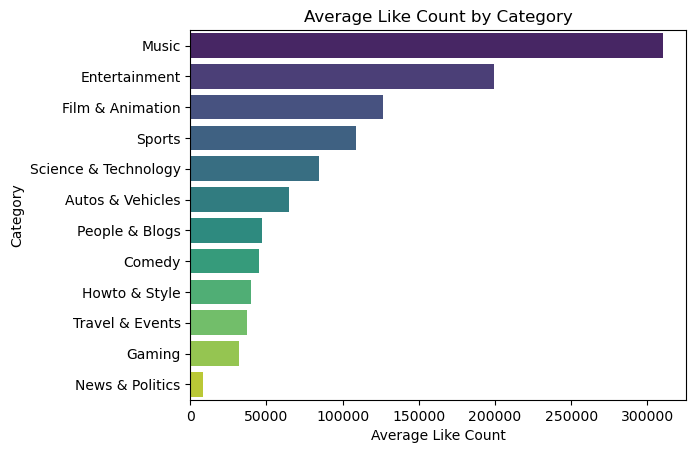

In [88]:
fig, ax = plt.subplots()

sns.barplot(y=categorial_likecount.index, x=categorial_likecount.values, ax=ax, palette='viridis')
ax.set_title('Average Like Count by Category')
ax.set_xlabel('Average Like Count')
ax.set_ylabel('Category')

plt.show()

In [90]:
print('From the bar graph it is seen that Music, Entertainment, Film & Animation, Sports have the highest average like count')

From the bar graph it is seen that Music, Entertainment, Film & Animation, Sports have the highest average like count


In [91]:
categorical_commentcount =  trending_videos.groupby('category_name')['comment_count'].mean().sort_values(ascending=False)

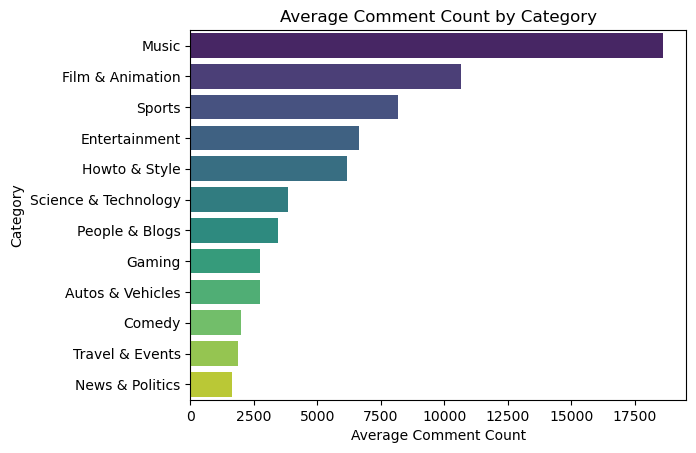

In [92]:
fig, ax = plt.subplots()

sns.barplot(y=categorical_commentcount.index, x=categorical_commentcount.values, ax=ax, palette='viridis')
ax.set_title('Average Comment Count by Category')
ax.set_xlabel('Average Comment Count')
ax.set_ylabel('Category')

plt.show()

In [93]:
print('From the bar graph it is seen that Music, Film & Animation, Sports, Entertainment have the highest average like count')

From the bar graph it is seen that Music, Film & Animation, Sports, Entertainment have the highest average like count


In [ ]:
# Entertainment and Music categories have the highest average view counts, likes, and comments. 
# Film & Animation also shows high engagement, especially in comment counts and like counts.

In [ ]:
# Analysing the content and duration of the videos. converting the duration from ISO 8601 format to seconds

In [96]:
!pip install isodate

  Obtaining dependency information for isodate from https://files.pythonhosted.org/packages/15/aa/0aca39a37d3c7eb941ba736ede56d689e7be91cab5d9ca846bde3999eba6/isodate-0.7.2-py3-none-any.whl.metadata


In [97]:
import isodate

In [99]:
trending_videos['duration_seconds']=trending_videos['duration'].apply(lambda x:isodate.parse_duration(x).total_seconds())

In [100]:
trending_videos['duration_range'] = pd.cut(trending_videos['duration_seconds'],bins=[0,300,600,1200,3600,7200], labels=['0-5 min','5-10 min','10-20 min','20-60 min','60-120 min'])

In [101]:
trending_videos.head()

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count,category_name,duration_seconds,duration_range
0,md9-jG4RzXs,Race Highlights | 2025 Australian Grand Prix,Relive the incredible action from the Australi...,2025-03-16 07:38:24+00:00,UCB_qr75-ydFVKSF9Dmo6izg,FORMULA 1,17,"['F1', 'Formula One', 'Formula 1', 'Sports', '...",PT13M2S,hd,False,8113500,198297,0,0,8192,Sports,782.0,10-20 min
1,IQJL3htsDyQ,Can You Fool A Self Driving Car?,Never underestimate the power of freakin' lase...,2025-03-15 15:00:28+00:00,UCY1kMZp36IQSyNx_9h4mpCg,Mark Rober,28,[],PT18M54S,hd,True,9938397,376202,0,0,13581,Science & Technology,1134.0,10-20 min
2,y-34-bAKgU8,I Tried Every Train in Japan,I ♥️ trains,2025-03-15 15:01:14+00:00,UCnmGIkw-KdI0W5siakKPKog,Ryan Trahan,24,"['Ryan', 'Trahan', 'I tried the weirdest faste...",PT22M27S,hd,True,3386634,122420,0,0,8331,Entertainment,1347.0,20-60 min
3,_qssZAbaYkA,NASA's SpaceX Crew-10 Docks With the ISS: All ...,After a 28-hour flight aboard the Crew Dragon ...,2025-03-16 08:01:19+00:00,UCOmcA3f_RrH6b9NmcNa4tdg,CNET,28,"['CNET', 'Technology', 'tech', 'Tech Devices',...",PT13M46S,hd,False,913955,12652,0,0,2781,Science & Technology,826.0,10-20 min
4,zNhtz0Lygik,Best Part (feat. H.E.R.),Provided to YouTube by HV Recordings\n\nBest P...,2025-02-27 21:52:20+00:00,UCcbtSIy5DlnpVIxW8hIvxBw,Daniel Caesar - Topic,10,"['Daniel Caesar', 'H.E.R.', 'Freudian', 'Best ...",PT3M30S,hd,False,360591,3661,0,0,567,Music,210.0,0-5 min


In [ ]:
# In the given code, we utilize the isodate library to convert video durations from the ISO 8601 format into seconds, 
# making them suitable for numerical analysis. Once converted, we classify the videos into predefined duration ranges 
# (0-5 minutes, 5-10 minutes, 10-20 minutes, 20-60 minutes, and 60-120 minutes) by adding a new column called duration_range. 
# This categorization helps analyze and compare engagement metrics across 
# different video lengths, offering insights into the impact of duration on viewer behavior and overall video performance.

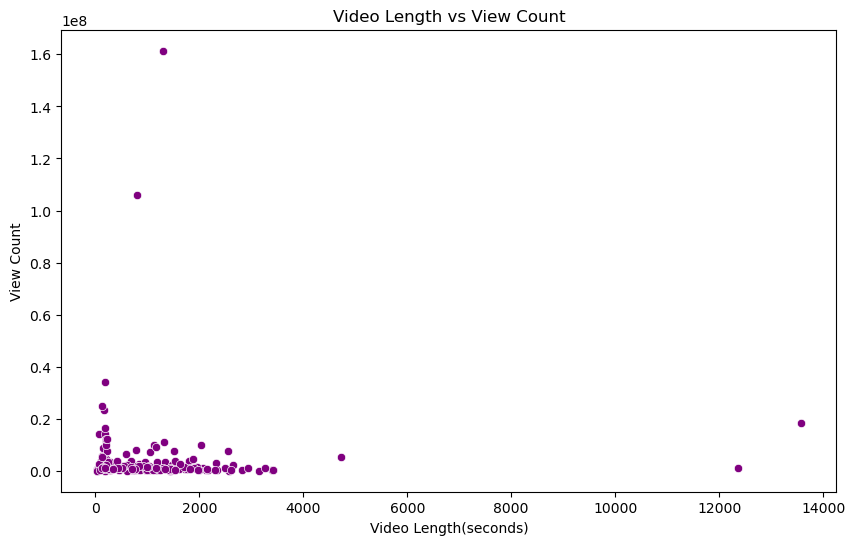

In [104]:
# scatter plot for video length vs view count

plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_seconds', y='view_count', data=trending_videos, color='purple')
plt.title('Video Length vs View Count')
plt.xlabel('Video Length(seconds)')
plt.ylabel('View Count')
plt.show()

In [ ]:
# bar chart illustrating duration_range w.r.t like counts

In [105]:
durationrange_like = trending_videos.groupby('duration_range')['like_count'].mean().sort_values(ascending= False)

C:\Users\D\AppData\Local\Temp\ipykernel_8280\1415491535.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  durationrange_like = trending_videos.groupby('duration_range')['like_count'].mean().sort_values(ascending= False)


In [106]:
durationrange_like.index

CategoricalIndex(['0-5 min', '60-120 min', '20-60 min', '10-20 min',
                  '5-10 min'],
                 categories=['0-5 min', '5-10 min', '10-20 min', '20-60 min', '60-120 min'], ordered=True, dtype='category', name='duration_range')

C:\Users\D\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


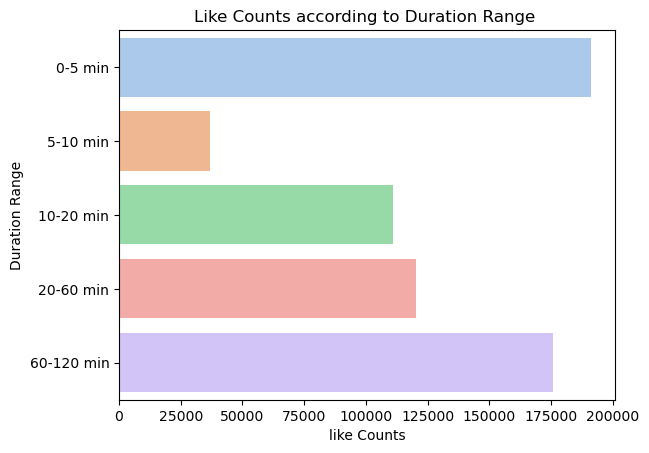

In [111]:
fig, ax = plt.subplots()

sns.barplot(y = durationrange_like.index, x = durationrange_like.values, ax=ax, palette='pastel' )
ax.set_title('Like Counts according to Duration Range ')
ax.set_xlabel('like Counts')
ax.set_ylabel('Duration Range')

plt.show()

In [113]:
durationrange_view = trending_videos.groupby('duration_range')['view_count'].mean().sort_values(ascending= False)

C:\Users\D\AppData\Local\Temp\ipykernel_8280\3458091348.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  durationrange_view = trending_videos.groupby('duration_range')['view_count'].mean().sort_values(ascending= False)


In [ ]:
# bar chart illustrating duration_range w.r.t view counts

C:\Users\D\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


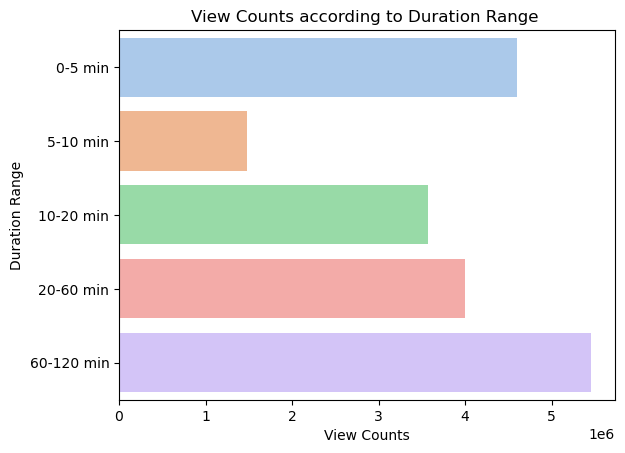

In [114]:
fig, ax = plt.subplots()

sns.barplot(y = durationrange_view.index, x = durationrange_view.values, ax=ax, palette='pastel' )
ax.set_title('View Counts according to Duration Range ')
ax.set_xlabel('View Counts')
ax.set_ylabel('Duration Range')

plt.show()

In [115]:
durationrange_comment = trending_videos.groupby('duration_range')['comment_count'].mean().sort_values(ascending= False)

C:\Users\D\AppData\Local\Temp\ipykernel_8280\4028216652.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  durationrange_comment = trending_videos.groupby('duration_range')['comment_count'].mean().sort_values(ascending= False)


In [ ]:
# bar chart illustrating duration_range w.r.t comment counts

C:\Users\D\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


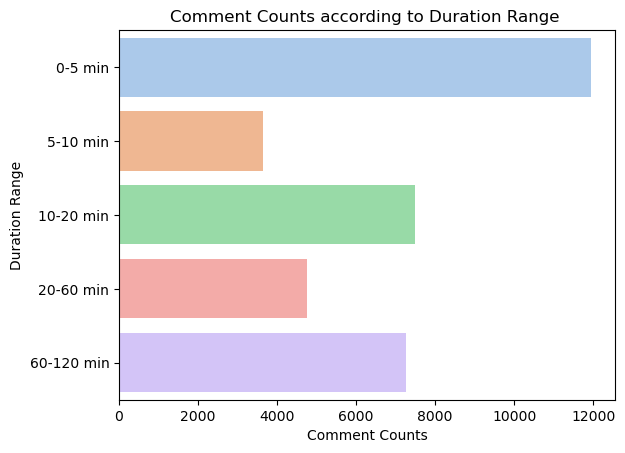

In [116]:


fig, ax = plt.subplots()

sns.barplot(y = durationrange_comment.index, x = durationrange_comment.values, ax=ax, palette='pastel' )
ax.set_title('Comment Counts according to Duration Range ')
ax.set_xlabel('Comment Counts')
ax.set_ylabel('Duration Range')

plt.show()

In [ ]:
# The scatter plot shows a slight negative correlation, indicating shorter videos tend to have higher view counts. 
# Videos in the 0-5 minute range have the highest average view counts, likes, and comments.

In [117]:
#impact of the time a video is posted on its views

In [119]:
trending_videos['publish_hour'] = trending_videos['published_at'].dt.hour

In [121]:
trending_videos.head()

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count,category_name,duration_seconds,duration_range,publish_hour
0,md9-jG4RzXs,Race Highlights | 2025 Australian Grand Prix,Relive the incredible action from the Australi...,2025-03-16 07:38:24+00:00,UCB_qr75-ydFVKSF9Dmo6izg,FORMULA 1,17,"['F1', 'Formula One', 'Formula 1', 'Sports', '...",PT13M2S,hd,False,8113500,198297,0,0,8192,Sports,782.0,10-20 min,7
1,IQJL3htsDyQ,Can You Fool A Self Driving Car?,Never underestimate the power of freakin' lase...,2025-03-15 15:00:28+00:00,UCY1kMZp36IQSyNx_9h4mpCg,Mark Rober,28,[],PT18M54S,hd,True,9938397,376202,0,0,13581,Science & Technology,1134.0,10-20 min,15
2,y-34-bAKgU8,I Tried Every Train in Japan,I ♥️ trains,2025-03-15 15:01:14+00:00,UCnmGIkw-KdI0W5siakKPKog,Ryan Trahan,24,"['Ryan', 'Trahan', 'I tried the weirdest faste...",PT22M27S,hd,True,3386634,122420,0,0,8331,Entertainment,1347.0,20-60 min,15
3,_qssZAbaYkA,NASA's SpaceX Crew-10 Docks With the ISS: All ...,After a 28-hour flight aboard the Crew Dragon ...,2025-03-16 08:01:19+00:00,UCOmcA3f_RrH6b9NmcNa4tdg,CNET,28,"['CNET', 'Technology', 'tech', 'Tech Devices',...",PT13M46S,hd,False,913955,12652,0,0,2781,Science & Technology,826.0,10-20 min,8
4,zNhtz0Lygik,Best Part (feat. H.E.R.),Provided to YouTube by HV Recordings\n\nBest P...,2025-02-27 21:52:20+00:00,UCcbtSIy5DlnpVIxW8hIvxBw,Daniel Caesar - Topic,10,"['Daniel Caesar', 'H.E.R.', 'Freudian', 'Best ...",PT3M30S,hd,False,360591,3661,0,0,567,Music,210.0,0-5 min,21


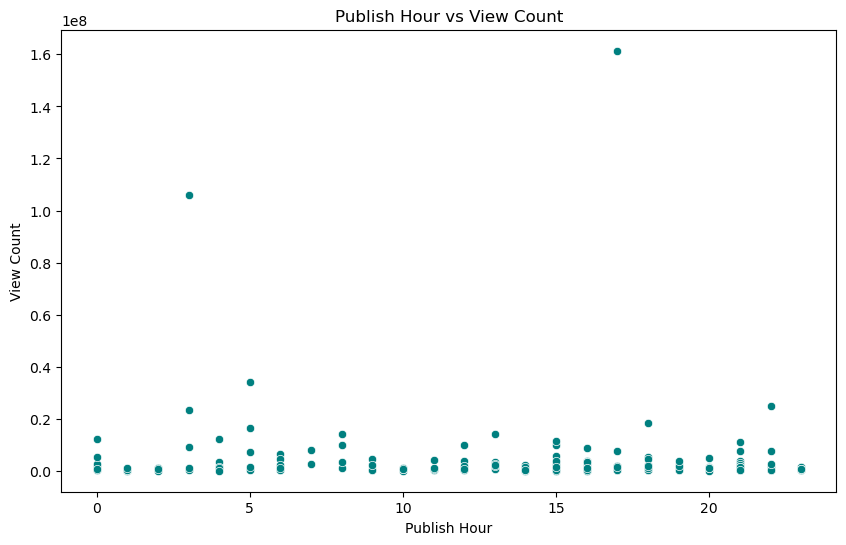

In [127]:
# scatter plot for publish hour vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='publish_hour', y='view_count', data=trending_videos, color='teal')
plt.title('Publish Hour vs View Count')
plt.xlabel('Publish Hour')
plt.ylabel('View Count')
plt.show()

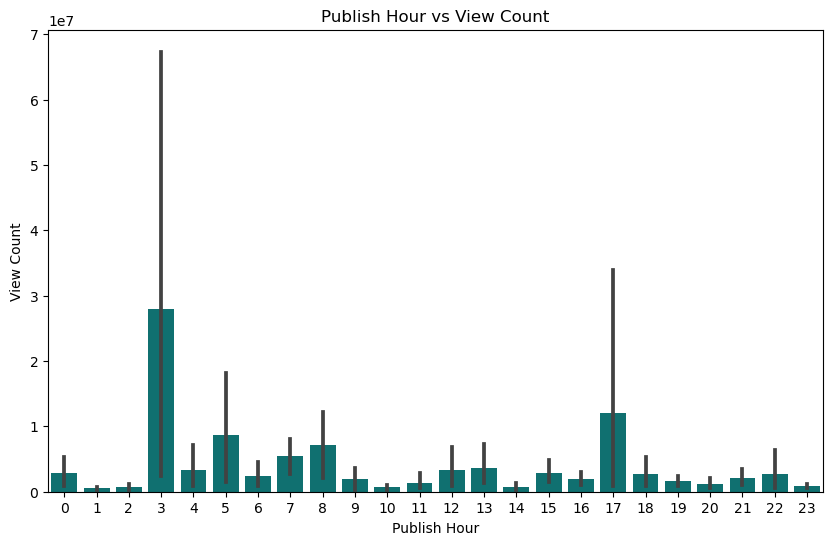

In [129]:
# scatter plot for publish hour vs view count
plt.figure(figsize=(10, 6))
sns.barplot(x='publish_hour', y='view_count', data=trending_videos, color='teal')
plt.title('Publish Hour vs View Count')
plt.xlabel('Publish Hour')
plt.ylabel('View Count')
plt.show()

In [ ]:
The distribution shows that most videos are published at 3:00 and 17:00 hours 
(3 AM and 5 PM), indicating this may be an optimal time for uploading videos. 

In [ ]:
Conclusion:
Views depend upon the category of the video made.
Aim to create shorter videos (under 5 minutes) for higher engagement, especially for categories like Music and Entertainment.
Schedule video uploads around peak times (3 AM and 5 PM) to maximize initial views and engagement.